In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [2]:
import chardet
import pandas as pd

with open('spam.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
df = pd.read_csv('spam.csv', encoding = enc['encoding'])

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(3)

,v1,v2
2370,ham,"That day Ì_ say Ì_ cut ur hair at paragon, is ..."
762,spam,Urgent Ur å£500 guaranteed award is still uncl...
1126,ham,Not tonight mate. Catching up on some sleep. T...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(3)

,target,text
3320,ham,Yo im right by yo work
3095,ham,We walked from my moms. Right on stagwood pass...
2948,ham,at bruce b downs &amp; fletcher now


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

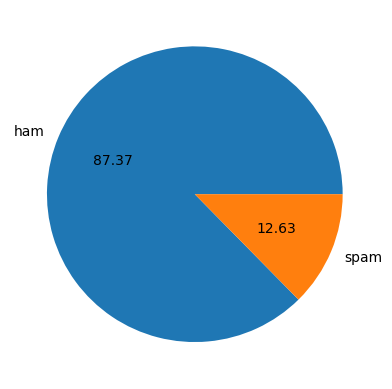

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%.2f")
plt.show()

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
!pip install --upgrade nltk


In [22]:
from nltk import punkt

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
df['num_character'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import re

def custom_tokenizer(text):
    # Use regular expression to split on non-alphanumeric characters
    return re.findall(r'\w+', text)


In [27]:
# num of words
df['words'] = df['text'].apply(custom_tokenizer)
#df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df['num_words'] = df['words'].apply(len)

In [29]:
df.head()

,target,text,num_character,words,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, crazy, Available, o...",20
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",33
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, U, c, already, t...",11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, don, t, think, he, goes, to, usf, he,...",14


In [30]:
df.drop(columns=['words'],inplace=True)

In [31]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [32]:
import re

def custom_sent_tokenize(text):
    sentences = re.split(r'(?<!\w\.\w)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', text)
    return sentences

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [34]:
df['sentnumber'] = df['text'].apply(custom_sent_tokenize)

In [35]:
df['num_sentences'] = df['sentnumber'].apply(len)

In [36]:
#df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_character,num_words,sentnumber,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,"[Go until jurong point, crazy.., Available onl...",3
1,0,Ok lar... Joking wif u oni...,29,6,"[Ok lar..., Joking wif u oni...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,0,U dun say so early hor... U c already then say...,49,11,"[U dun say so early hor..., U c already then s...",2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,"[Nah I don't think he goes to usf, he lives ar...",1


In [38]:
df.drop(columns=['sentnumber'],inplace=True)

In [39]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [40]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,2.085703
std,58.236293,11.518372,1.518655
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,23.000000,3.000000
max,910.000000,190.000000,39.000000


In [41]:
#ham = 0
df[df['target']==0][['num_character','num_sentences']].describe()

,num_character,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.947077
std,56.358207,1.460317
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,39.000000


In [42]:
#spam = 1
df[df['target']==1][['num_character','num_sentences']].describe()

,num_character,num_sentences
count,653.000000,653.000000
mean,137.891271,3.044410
std,30.137753,1.568337
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


In [43]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

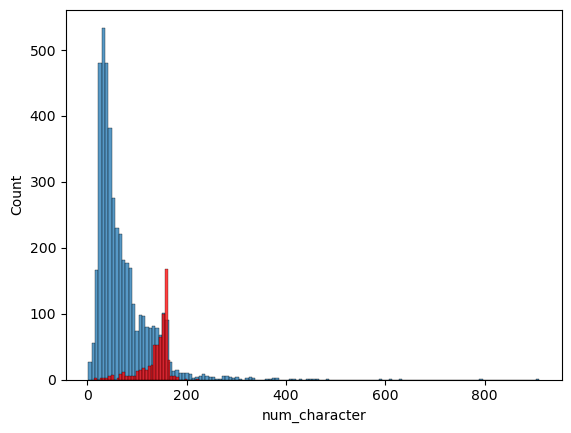

In [44]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

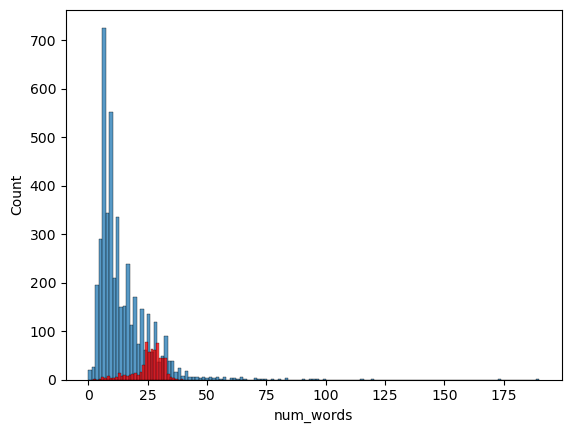

In [45]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

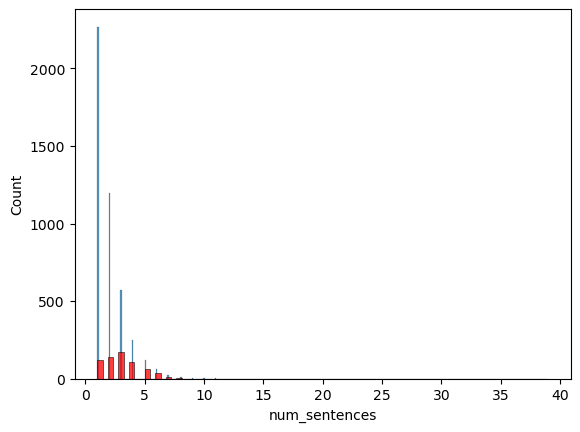

In [46]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

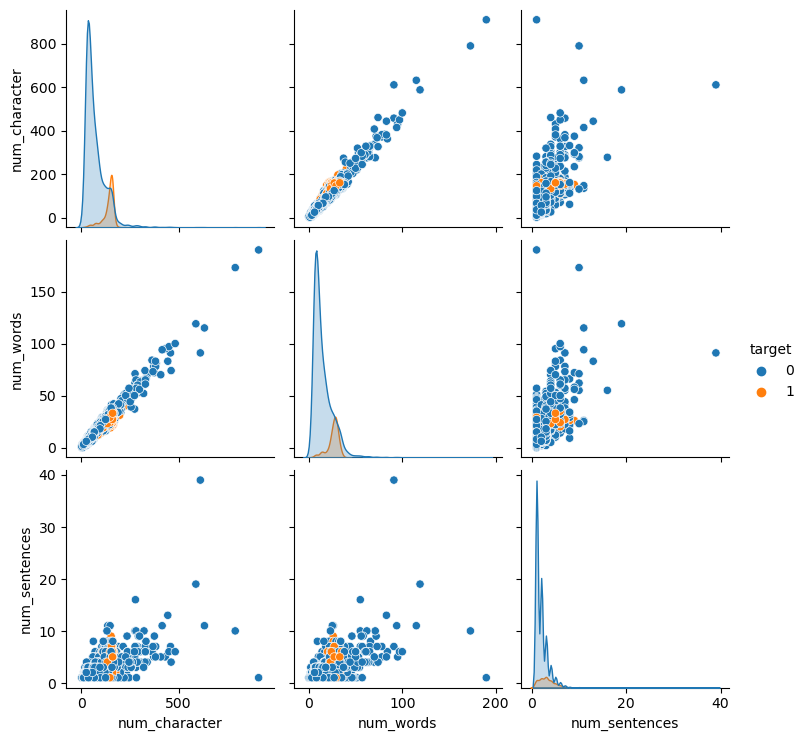

In [47]:
sns.pairplot(df,hue='target')

In [48]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [49]:
df['num_character'].corr(df['num_words'])

0.9800908114984697

In [50]:
df['num_character'].corr(df['num_sentences'])

0.6296859466513324

In [51]:
df['num_words'].corr(df['num_sentences'])

0.6049325075755443

In [52]:
attributes = ['target','num_character','num_sentences']

In [53]:
 corr_matrix = df[attributes].corr()

In [54]:
import matplotlib.pyplot as plt

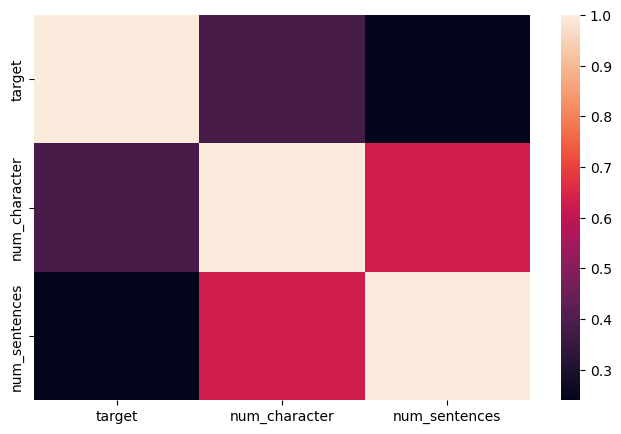

In [55]:
plt.figure(figsize=(8, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix)
plt.show()

In [56]:
# peforming data cleaning and Preprocessing
# 1) lower casing 2) tokenisation 3) removing special char,stop words,symbols and puncutations 4) stemming

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [58]:
def transform_text(text):
    text = text.lower()
    text = custom_tokenizer(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
            
        

In [59]:
print(transform_text("Did you like my lovely presentation on ML"))

did you like my love present on ml


In [60]:
def remove_stopwords(text):
    stopwords = set([
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you’re', 'you’ve', 'you’ll',
         'you’d', 'your', 'yours', 'yourself', 'yourselves', 'he', 'hi', 'his', 'himself','she', 'she’s', 
         'her', 'hers', 'herself', 'it', 'it’s', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
         'what', 'which', 'who', 'whom', 'this', 'that', 'that’ll', 'these', 'those', 'am', 'is', 'are', 'was', 
         'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
         'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at','by', 'for', 'with', 
         'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
         'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
         'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
         'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 
         't', 'can', 'will', 'just', 'don', 'don’t', 'should', 'should’ve', 'now', 'd', 'll', 'm', 'o', 're', 
         've', 'y', 'ain', 'aren', 'aren’t', 'couldn', 'couldn’t', 'didn', 'didn’t', 'doesn', 'doesn’t', 'hadn', 
         'hadn’t', 'hasn', 'hasn’t', 'haven', 'haven’t', 'isn', 'isn’t', 'ma', 'mightn', 'mightn’t', 'mustn',
         'mustn’t', 'needn', 'needn’t', 'shan', 'shan’t', 'shouldn', 'shouldn’t', 'wasn', 'wasn’t', 'weren', 
         'weren’t', 'won', 'won’t', 'wouldn', 'wouldn’t','in'
        
    ])
        
    
    # Split the text into words
    words = text.split()

    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Join the filtered words back into a sentence
    result = ' '.join(filtered_words)

    return result


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')  

vectors=cv.fit_transform(df['text'])

In [62]:
remove_stopwords("did you like my love present in ml")

'like love present ml'

In [63]:
df['transformedtext'] = df['text'].apply(remove_stopwords)

In [64]:
 df['transformed_text']= df['transformedtext'].apply(transform_text)

In [65]:
transform_text("Did you like my lovely presentation on ML")

'did you like my love present on ml'

In [66]:
df.head()

,target,text,num_character,num_words,num_sentences,transformedtext,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,"Go jurong point, crazy.. Available bugis n gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,Free entry 2 wkly comp win FA Cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,U dun say early hor... U c already say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,"Nah don't think goes usf, lives around though",nah don t think goe usf live around though


In [67]:
df.drop(columns=['transformedtext'],inplace=True)

In [68]:
!pip install wordcloud


In [69]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [70]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

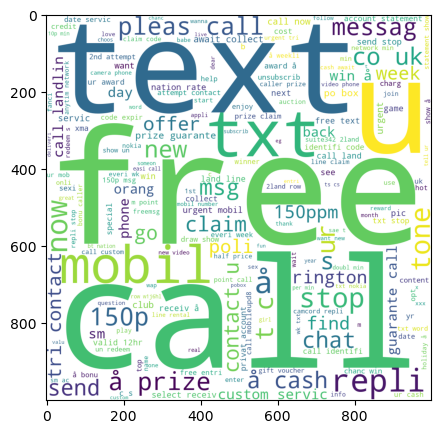

In [71]:
plt.figure(figsize=(20,5))
plt.imshow(spam_wc)

In [72]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

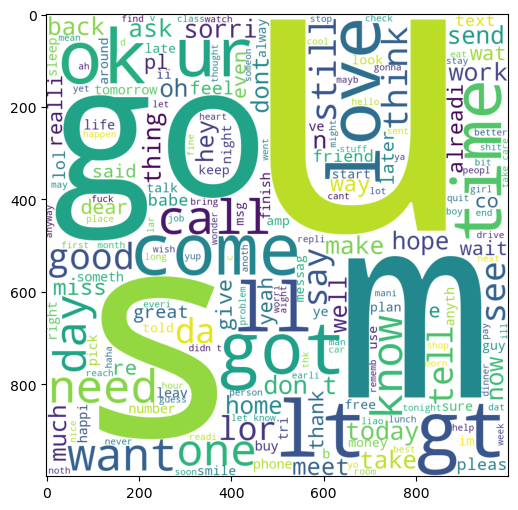

In [73]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [74]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'appli',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'darl',
 'it',
 's',
 '3',
 'week',
 's',
 'word',
 'back',
 'i',
 'd',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å',
 '1',
 '50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli',
 'mobil',
 '11',
 'month',
 'more',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6day',
 '16',
 'tsandc',
 'appli',
 're

In [76]:
len(spam_corpus)

12519

In [77]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [78]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'don',
 't',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'me',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'i',
 'm',
 'gonna',
 'home',
 'soon',
 'don',
 't',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'i',
 've',
 'cri',
 'enough',
 'today',
 'i',
 've',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'will',
 'oh',
 'k',
 'i',
 'm',
 'watch',
 'here',
 'eh',
 'u',
 

In [79]:
len(ham_corpus)

41303

In [80]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 327),
 ('å', 247),
 ('free', 195),
 ('2', 184),
 ('u', 147),
 ('txt', 145),
 ('text', 128),
 ('ur', 119),
 ('mobil', 118),
 ('4', 114),
 ('stop', 109),
 ('repli', 103),
 ('claim', 98),
 ('1', 93),
 ('now', 85),
 ('prize', 83),
 ('www', 83),
 ('s', 75),
 ('get', 75),
 ('min', 71),
 ('tone', 70),
 ('t', 69),
 ('cash', 65),
 ('servic', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 61),
 ('nokia', 59),
 ('urgent', 58),
 ('msg', 58),
 ('contact', 56),
 ('week', 55),
 ('award', 55),
 ('pleas', 52),
 ('phone', 52),
 ('win', 51),
 ('c', 50),
 ('com', 47),
 ('50', 46),
 ('messag', 45),
 ('collect', 45),
 ('co', 43),
 ('18', 43),
 ('custom', 42),
 ('guarante', 42),
 ('you', 42),
 ('per', 41),
 ('16', 39),
 ('chat', 39)]

In [81]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,915
1,i,712
2,s,453
3,go,405
4,m,381
5,t,363
6,get,354
7,2,302
8,gt,288
9,lt,287


In [82]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,327
1,å,247
2,free,195
3,2,184
4,u,147
5,txt,145
6,text,128
7,ur,119
8,mobil,118
9,4,114


# MODEL TRAINING

In [83]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [84]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
#X = cv.fit_transform(df['transformed_text']).toarray()

In [85]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
X.shape

(5169, 3000)

In [87]:
y = df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8839458413926499
[[797  99]
 [ 21 117]]
0.5416666666666666


In [93]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [94]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


# TRYING DIFFERENT MODELS FOR ANY IMPROVMENT

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [98]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [99]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9754098360655737)

In [100]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9042553191489362, 1.0)

In [101]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.97678916827853, 1.0)

In [102]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9342359767891683, 0.8240740740740741)

In [103]:
# NO OTHER MODEL IS PEFORMING ANY BETTER

In [104]:
# NOTE THAT NOW BNB PEFORMS BETTER

# IMPORTING THE MODEL

In [105]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))